In [1]:
import gc
import numpy as np

In [2]:
from workflows import *

In [3]:
max_out_dim = 10
out_dims = np.arange(1, max_out_dim+1)
DSET = 'fmnist'
TASK = 'class'
HEAD = 'logreg'
METRIC = 'accuracy'

algos = ['pca', 'spca', 'kspca', 'srp', 'ksrp']
res_mat = np.zeros((len(algos), max_out_dim))

for j, algo in enumerate(algos):
    algo_results = np.zeros(max_out_dim)
    for i, dim in enumerate(out_dims):
        res = multi_trial(odim=dim, algo_name=algo, dset=DSET, task=TASK, head_type=HEAD, met=METRIC)
        algo_results[i] = res
    res_mat[j] = algo_results
    
res_mat = res_mat.transpose()

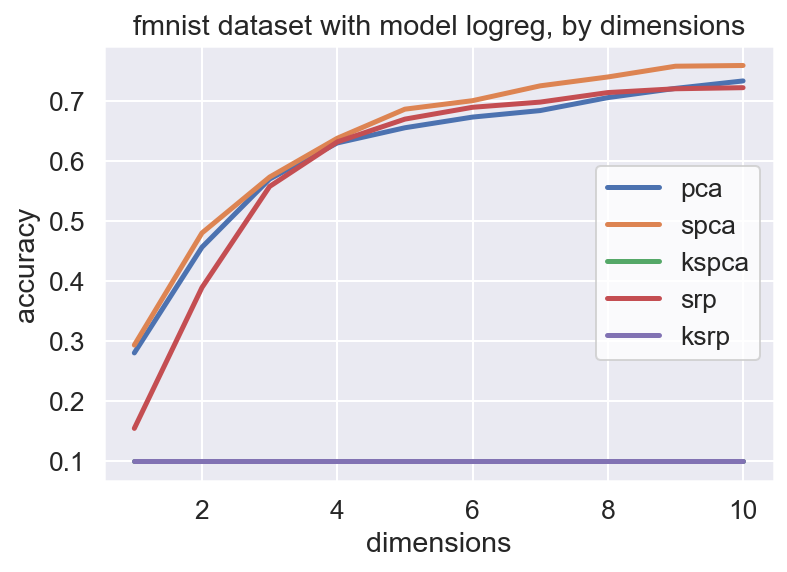

In [4]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

# change result array into a df for sns plot 
res_df = pd.DataFrame(res_mat, columns=algos, index=out_dims)
res_df['dimensions'] = out_dims

sns.set_theme()
sns.set(font_scale=1.2)

for algo in algos:
    plot = sns.lineplot(x='dimensions', y=algo, data=res_df, lw=2.5)
plt.legend(labels=algos, facecolor='white')
plot.set(ylabel=METRIC, title = f'{DSET} dataset with model {HEAD}, by dimensions');